New training accuracy: 100.0
New test accuracy: 52.17391304347826
w shape: (12288, 1) b: 0.03599716899990484
Misclassified indices in new test set: [ 0  1  4  6  7  8  9 10 12 14 16 20 22 25 29 32 33 34 35 37 41 42]


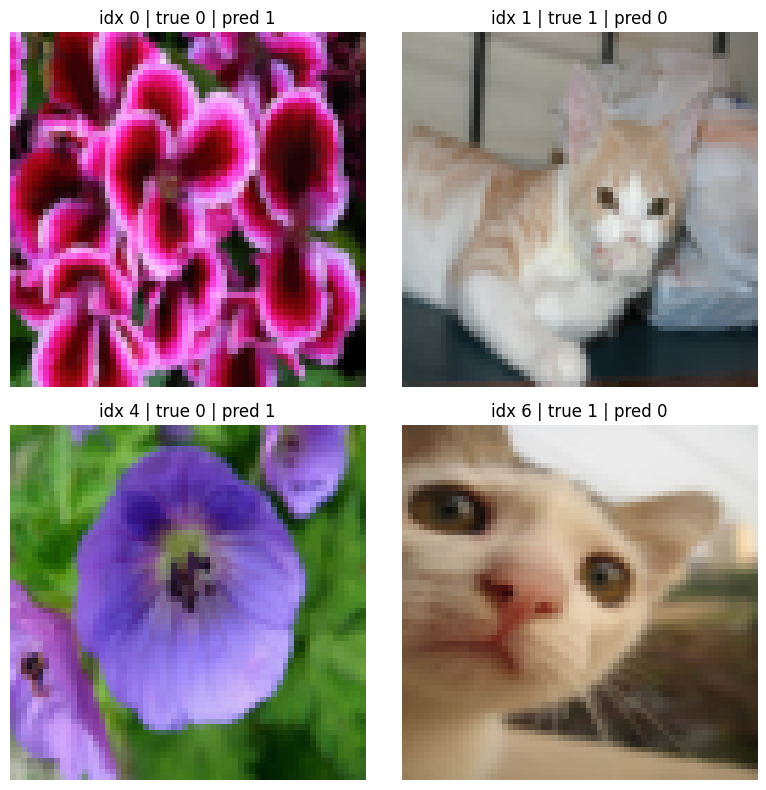

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#Loading only the original training set from the .h5 file
def load_train_only():
    train_dataset = h5py.File("train_catvnoncat.h5", "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])
    train_set_y_orig = train_set_y_orig.reshape(1, train_set_y_orig.shape[0])
    return train_set_x_orig, train_set_y_orig
#Reading all original training images and labels
train_x_orig_all, train_y_orig_all = load_train_only()
#Total number of training examples and image size
m_total = train_x_orig_all.shape[0]
num_px = train_x_orig_all.shape[1]

last_digit = 3  #last digit of sbu student id 
n_train_new = 160 + last_digit #New training size first 160 + last_digit images
n_test_new = m_total - n_train_new #New test size remaining images from the original training set

# split the original training set into new training and new test sets
train_x_new_orig = train_x_orig_all[:n_train_new]
train_y_new_orig = train_y_orig_all[:, :n_train_new]

test_x_new_orig = train_x_orig_all[n_train_new:]
test_y_new_orig = train_y_orig_all[:, n_train_new:]
#number of examples in new training and test sets
m_train_new = train_x_new_orig.shape[0]
m_test_new = test_x_new_orig.shape[0]
#flatten images and normalize pixel values to [0, 1]
train_x_new = train_x_new_orig.reshape(m_train_new, -1).T / 255.
test_x_new = test_x_new_orig.reshape(m_test_new, -1).T / 255.
train_y_new = train_y_new_orig
test_y_new = test_y_new_orig
#sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
#intialize parameter w and b 
def initialize_parameters(dim):
    w = np.zeros((dim, 1))
    b = 0.0
    return w, b
#forward and backward propogation
def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    cost = -np.sum(Y * np.log(A + 1e-15) + (1 - Y) * np.log(1 - A + 1e-15)) / m
    dw = np.dot(X, (A - Y).T) / m
    db = np.sum(A - Y) / m
    return dw, db, cost
# gradient descent optimization looop
def optimize(w, b, X, Y, num_iterations, learning_rate):
    for i in range(num_iterations):
        dw, db, cost = propagate(w, b, X, Y)
        w = w - learning_rate * dw
        b = b - learning_rate * db
    return w, b
#predict labels 
def predict(w, b, X):
    A = sigmoid(np.dot(w.T, X) + b)
    Y_prediction = (A > 0.5).astype(int)
    return Y_prediction
#dimensions of feature vector
dim = train_x_new.shape[0]
#initialize and train logistic regression model
w, b = initialize_parameters(dim)
w, b = optimize(w, b, train_x_new, train_y_new, num_iterations=2000, learning_rate=0.01)
#predictions on new training and new test sets
train_pred_new = predict(w, b, train_x_new)
test_pred_new = predict(w, b, test_x_new)
#Computing training and test accuracy 
train_accuracy_new = 100 - np.mean(np.abs(train_pred_new - train_y_new)) * 100
test_accuracy_new = 100 - np.mean(np.abs(test_pred_new - test_y_new)) * 100

print("New training accuracy:", train_accuracy_new)
print("New test accuracy:", test_accuracy_new)
print("w shape:", w.shape, "b:", b)
#finding indicesof misclassified
misclassified_indices_new = np.where(test_pred_new != test_y_new)[1]
print("Misclassified indices in new test set:", misclassified_indices_new)
#plotting up to 4 misclassified images
n_show = min(4, misclassified_indices_new.shape[0])
plt.figure(figsize=(8, 8))
for i in range(n_show):
    idx = misclassified_indices_new[i]
    image = test_x_new_orig[idx]
    label_true = test_y_new[0, idx]
    label_pred = test_pred_new[0, idx]
    plt.subplot(2, 2, i + 1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"idx {idx} | true {label_true} | pred {label_pred}")
plt.tight_layout()
plt.show()
